In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [4]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [9]:
text_df = df.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1)
text_df.head()

,Review Text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...


In [10]:
print(text_df['Review Text'].iloc[0],"\n")
print(text_df['Review Text'].iloc[1],"\n")
print(text_df['Review Text'].iloc[2],"\n")
print(text_df['Review Text'].iloc[3],"\n")
print(text_df['Review Text'].iloc[4],"\n")

Absolutely wonderful - silky and sexy and comfortable 

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. 

I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c 

I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! 

This shi

In [11]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22641 non-null  object
dtypes: object(1)
memory usage: 183.6+ KB


DATA PROCESSING

In [12]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words('english'))

In [22]:
def data_processing(text):
    if isinstance(text, str):  # Check if text is a string
        # Convert text to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r"https?\S+|www\S+", '', text, flags=re.MULTILINE)

        # Remove mentions and hashtags
        text = re.sub(r'\@\w+|\#', '', text)

        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)

        # Tokenize the text
        text_tokens = word_tokenize(text)

        # Remove stop words
        filtered_text = [w for w in text_tokens if not w in stop_words]

        # Join the filtered tokens back into a string
        return " ".join(filtered_text)
    else:
        return ''  # Return an empty string for NaN values

# Apply the data_processing function to the DataFrame
text_df['Review Text'] = text_df['Review Text'].apply(data_processing)

print(text_df)

                                             Review Text
0            absolutely wonderful silky sexy comfortable
1      love dress sooo pretty happened find store im ...
2      high hopes dress really wanted work initially ...
3      love love love jumpsuit fun flirty fabulous ev...
4      shirt flattering due adjustable front tie perf...
...                                                  ...
23481  happy snag dress great price easy slip flatter...
23482  reminds maternity clothes soft stretchy shiny ...
23483  fit well top see never would worked im glad ab...
23484  bought dress wedding summer cute unfortunately...
23485  dress lovely platinum feminine fits perfectly ...

[23486 rows x 1 columns]


In [23]:
text_df['Review Text'] = text_df['Review Text'].apply(data_processing)


In [24]:
text_df = text_df.drop_duplicates('Review Text')

In [25]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [26]:
text_df['Review Text'] = text_df['Review Text'].apply(lambda x: stemming(x))

In [27]:
text_df.head()

,Review Text
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store im ...
2,high hopes dress really wanted work initially ...
3,love love love jumpsuit fun flirty fabulous ev...
4,shirt flattering due adjustable front tie perf...


In [28]:
print(text_df['Review Text'].iloc[0],"\n")
print(text_df['Review Text'].iloc[1],"\n")
print(text_df['Review Text'].iloc[2],"\n")
print(text_df['Review Text'].iloc[3],"\n")
print(text_df['Review Text'].iloc[4],"\n")

absolutely wonderful silky sexy comfortable 

love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hits little knee would definitely true midi someone truly petite 

high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c 

love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments 

shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt 



In [29]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22632 entries, 0 to 23485
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  22632 non-null  object
dtypes: object(1)
memory usage: 353.6+ KB


TEXT POLARITY

In [51]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [52]:
text_df['polarity'] = text_df['Review Text'].apply(polarity)

In [60]:
text_df.head(20)

,Review Text,polarity,sentiment
0,absolutely wonderful silky sexy comfortable,0.633333,Positive
1,love dress sooo pretty happened find store im ...,0.318750,Positive
2,high hopes dress really wanted work initially ...,0.082300,Positive
3,love love love jumpsuit fun flirty fabulous ev...,0.500000,Positive
4,shirt flattering due adjustable front tie perf...,0.458333,Positive
5,love tracy reese dresses one petite 5 feet tal...,0.150000,Positive
6,aded basket hte last mintue see would look lik...,0.075625,Positive
7,ordered carbon store pick ton stuff always try...,0.196154,Positive
8,love dress usually get xs runs little snug bus...,-0.046875,Negative
9,im 55 125 lbs ordered petite make sure length ...,0.212554,Positive


In [61]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"


In [62]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [63]:
text_df.head()

,Review Text,polarity,sentiment
0,absolutely wonderful silky sexy comfortable,0.633333,Positive
1,love dress sooo pretty happened find store im ...,0.318750,Positive
2,high hopes dress really wanted work initially ...,0.082300,Positive
3,love love love jumpsuit fun flirty fabulous ev...,0.500000,Positive
4,shirt flattering due adjustable front tie perf...,0.458333,Positive


<Axes: xlabel='sentiment', ylabel='count'>

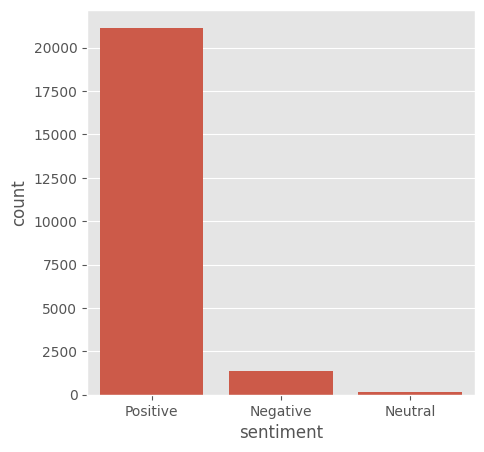

In [64]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

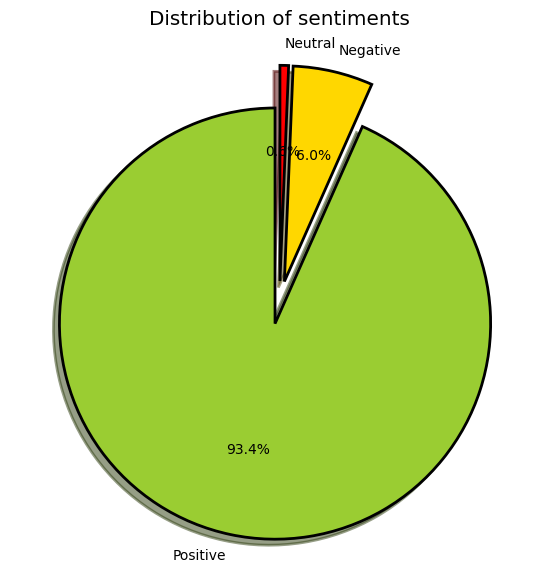

In [67]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [68]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Review Text,polarity,sentiment
13399,fits perfect,1.0,Positive
12834,perfect lunch girls pta saturdays family skirt...,1.0,Positive
22648,figure flattering 56 128 lbs 32b chest size xs...,1.0,Positive
20475,awesome flares flattering wardrobe staple,1.0,Positive
20422,coverup perfect beach pool see,1.0,Positive


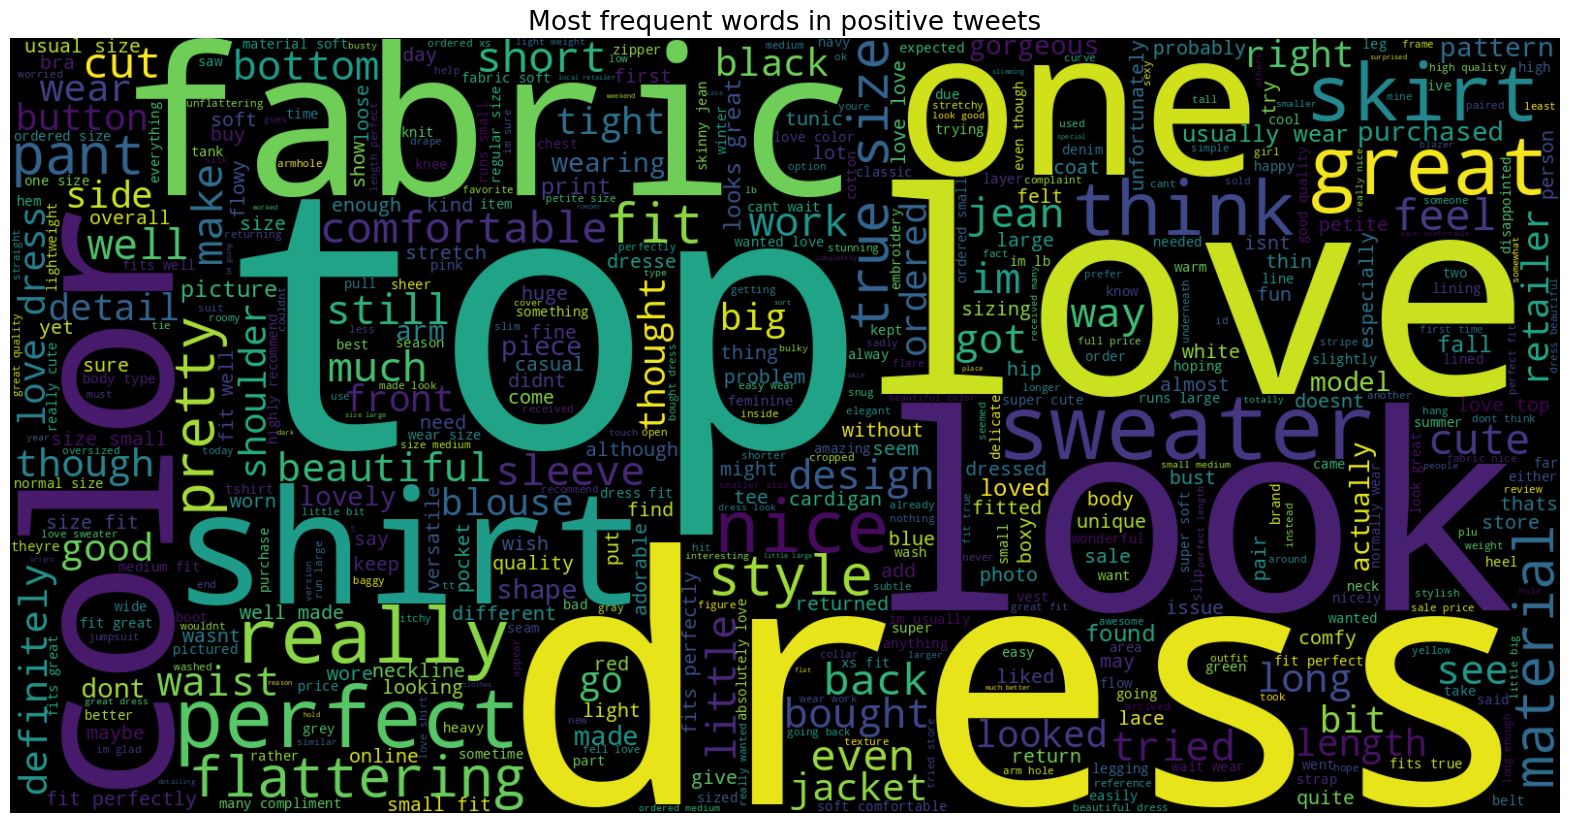

In [70]:
text = ' '.join([word for word in pos_tweets['Review Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [71]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Review Text,polarity,sentiment
15829,couldnt wait get dress bought instantly disapp...,-4.625929e-18,Negative
12253,love unusual print cut didnt work ive got roun...,-6.167906e-18,Negative
6628,snap one make sure order size larger normal si...,-1.009294e-17,Negative
17770,pants adorable fit perfectly long enough even ...,-1.233581e-17,Negative
13855,purchased dress wear horse race also wearing s...,-1.850372e-17,Negative


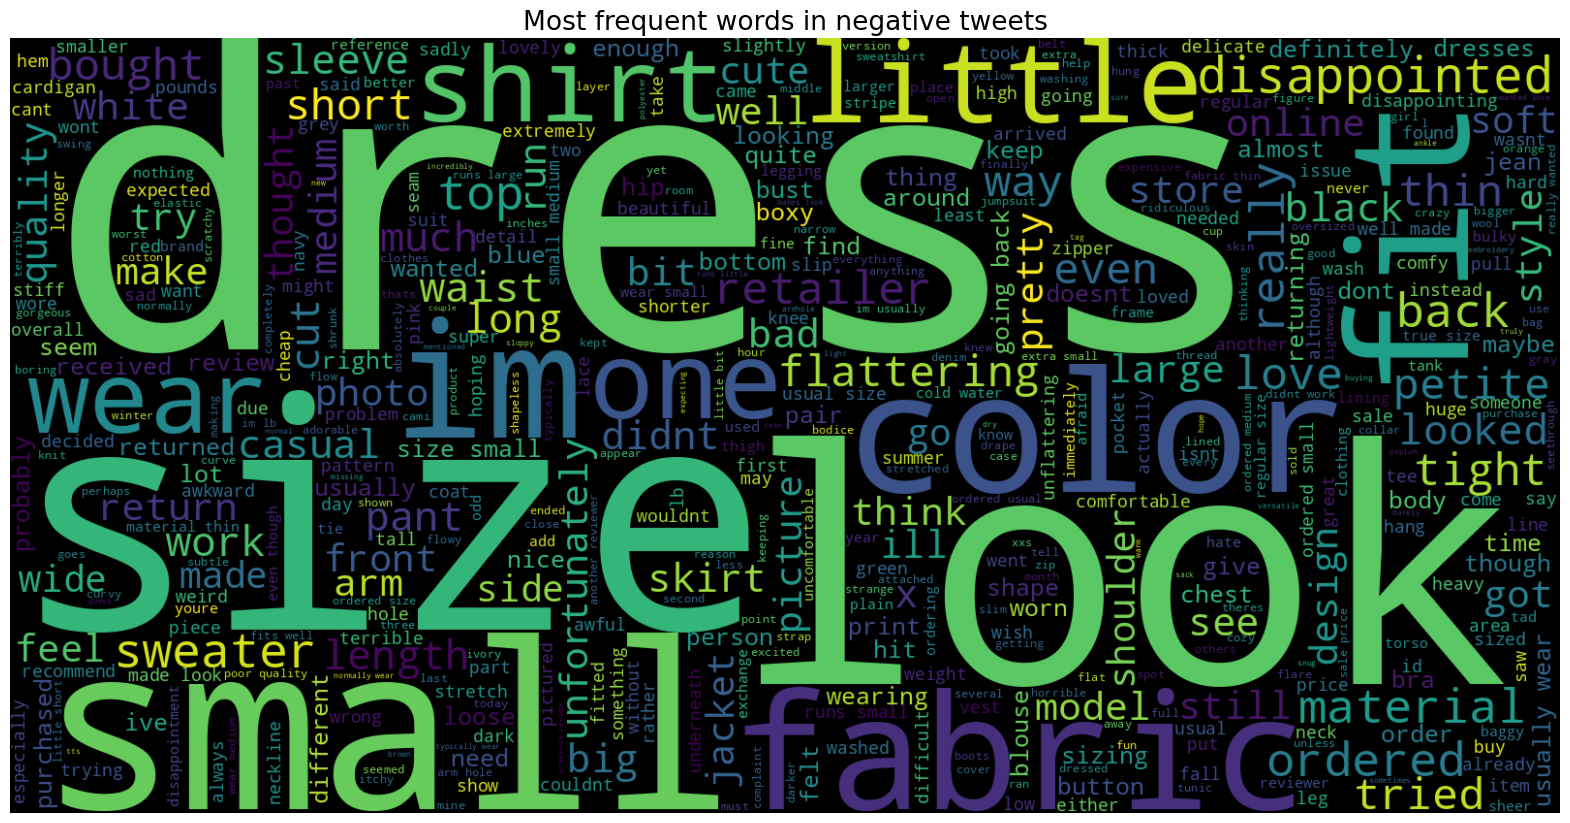

In [73]:
text = ' '.join([word for word in neg_tweets['Review Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [74]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Review Text,polarity,sentiment
28,several goodhyouman shirts get many compliment...,0.0,Neutral
16660,shorts flattering def purchase another pair,0.0,Neutral
14290,shirt comfy slenderizing waist area,0.0,Neutral
14304,ordered size xl ran small im pearshape thought...,0.0,Neutral
14462,thing like jacket could find size sold retaile...,0.0,Neutral


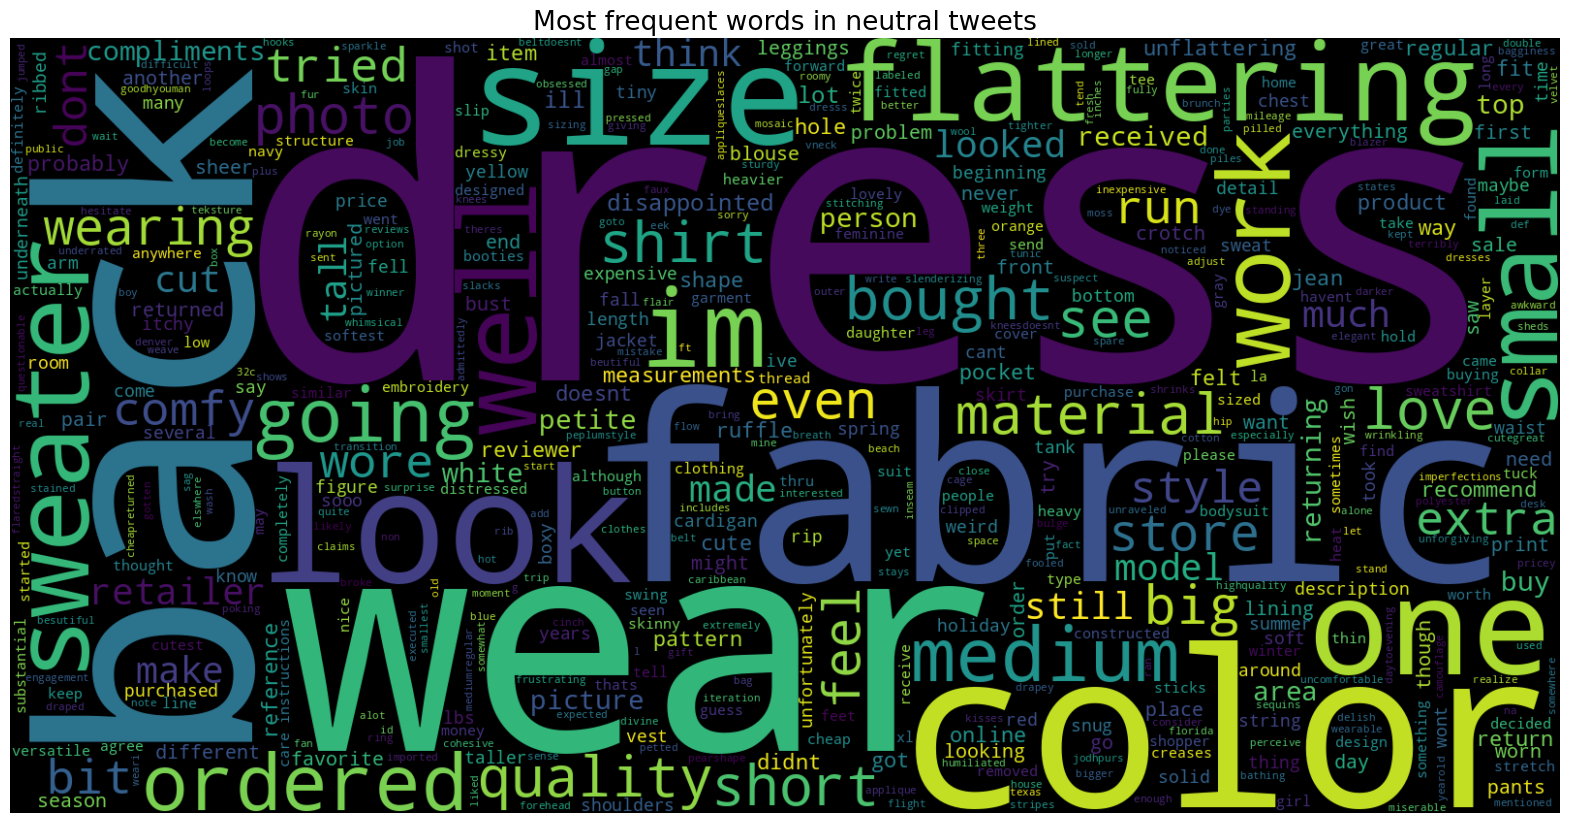

In [76]:
text = ' '.join([word for word in neutral_tweets['Review Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

VECTORIZATION

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer and fit to the text data
vect = CountVectorizer(ngram_range=(1, 2)).fit(text_df['Review Text'])

# Get feature names
feature_names = vect.get_feature_names_out()

# Print number of features and first 20 features
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))


Number of features: 301562

First 20 features:
 ['00' '00 00p' '00 24' '00 32c' '00 515' '00 also' '00 arent' '00 arm'
 '00 based' '00 big' '00 blouse' '00 blouses' '00 bought' '00 could'
 '00 decided' '00 dresses' '00 even' '00 fit' '00 fits' '00 get']


LOGISTIC REGRESSION

In [82]:
X = text_df['Review Text']
Y = text_df['sentiment']
X = vect.transform(X)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [84]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (18105, 301562)
Size of y_train: (18105,)
Size of x_test: (4527, 301562)
Size of y_test: (4527,)


In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.83%


In [88]:
from sklearn.metrics import classification_report

# Assuming you have already trained your logistic regression model (logreg)
# and made predictions on the test set (x_test)

# Calculate predictions
logreg_pred = logreg.predict(x_test)

# Generate classification report
report = classification_report(y_test, logreg_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.46      0.60       266
     Neutral       0.50      0.04      0.07        28
    Positive       0.96      1.00      0.98      4233

    accuracy                           0.96      4527
   macro avg       0.77      0.50      0.55      4527
weighted avg       0.95      0.96      0.95      4527



In [89]:
from sklearn.metrics import classification_report

# Assuming you have already trained your logistic regression model (logreg)
# and made predictions on the test set (x_test)

# Calculate predictions
logreg_pred = logreg.predict(x_test)

# Generate classification report
report = classification_report(y_test, logreg_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)


Precision: 0.7739337339976317
Recall: 0.4978772527823219
F1-Score: 0.5488091110521425


In [90]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 123    1  142]
 [   1    1   26]
 [  19    0 4214]]


              precision    recall  f1-score   support

    Negative       0.86      0.46      0.60       266
     Neutral       0.50      0.04      0.07        28
    Positive       0.96      1.00      0.98      4233

    accuracy                           0.96      4527
   macro avg       0.77      0.50      0.55      4527
weighted avg       0.95      0.96      0.95      4527



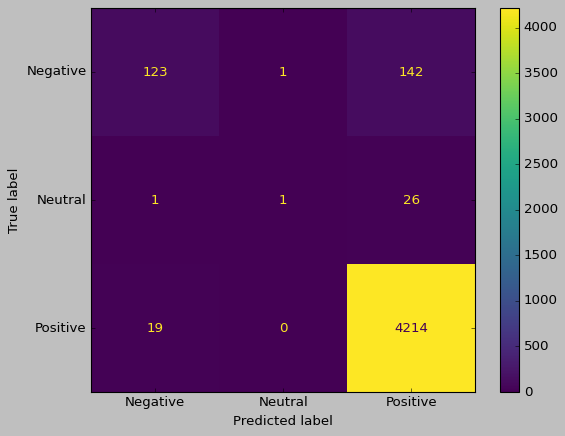

In [91]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

TUNED LOGISTIC REGRESSION MODEL

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [94]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [95]:
y_pred = grid.predict(x_test)

In [96]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.89%


In [97]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 131    4  131]
 [   1    1   26]
 [  24    0 4209]]


              precision    recall  f1-score   support

    Negative       0.84      0.49      0.62       266
     Neutral       0.20      0.04      0.06        28
    Positive       0.96      0.99      0.98      4233

    accuracy                           0.96      4527
   macro avg       0.67      0.51      0.55      4527
weighted avg       0.95      0.96      0.95      4527



SVC

In [98]:
from sklearn.svm import LinearSVC

In [99]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [100]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 95.94%


In [101]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 146    2  118]
 [   3    1   24]
 [  37    0 4196]]


              precision    recall  f1-score   support

    Negative       0.78      0.55      0.65       266
     Neutral       0.33      0.04      0.06        28
    Positive       0.97      0.99      0.98      4233

    accuracy                           0.96      4527
   macro avg       0.70      0.53      0.56      4527
weighted avg       0.95      0.96      0.95      4527



TUNED SVC

In [102]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [103]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [104]:
y_pred = grid.predict(x_test)

In [105]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.96%


In [106]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 142    8  116]
 [   3    7   18]
 [  35    3 4195]]


              precision    recall  f1-score   support

    Negative       0.79      0.53      0.64       266
     Neutral       0.39      0.25      0.30        28
    Positive       0.97      0.99      0.98      4233

    accuracy                           0.96      4527
   macro avg       0.72      0.59      0.64      4527
weighted avg       0.95      0.96      0.96      4527

